In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sdss.metadata import MetaData
meta = MetaData()
%matplotlib inline

In [2]:
def specobjid_to_idx(specobjid: int, ids: np.array):
    mask = np.where(ids[:, 1]==specobjid, True, False)
    idx = int(ids[mask, 0][0])
    return idx

In [3]:
meta_data_directory = "/home/edgar/spectra/0_01_z_0_5_4_0_snr_inf"
scores_directory = f"{meta_data_directory}/bin_04/explanation/256_128_64/latent_12"
wave = np.load(f"{meta_data_directory}/wave.npy")
spectra = np.load(f"{meta_data_directory}/spectra.npy", mmap_mode="r")
ids = np.load(f"{meta_data_directory}/ids_inputting.npy")

In [42]:
scores_names = {
    # "correlation": "Correlation score",
    # "correlation_filter_250kms": "Correlation score with a 250 kms filter",
    # "cosine": "Cosine disimilarity score",
    # "cosine_filter_250kms": "Cosine disimilarity score with a 250 kms filter",
    "lp_noRel100": "lp score",
    "lp_filter_250kms_noRel100": "lp score with a 250 kms filter",
    # "lp_noRel97": "lp score ignoring 3% of largest residuals",
    # "lp_filter_250kms_noRel97": "lp score ignoring 3% of largest residuals with a 250 kms filter",
    # "lp_rel100": "lp relative score",
    # "lp_filter_250kms_rel100": "lp relative score with a 250 kms filter",
    # "lp_rel97": "lp relative score\n ignoring 3% of largest residuals",
    # "lp_filter_250kms_rel97": "lp relative score ignoring 3% of largest residuals with a 250 kms filter",
    # "mse_noRel100": "MSE score",
    # "mse_filter_250kms_noRel100": "MSE score with a 250 kms filter",
    # "mse_noRel97": "MSE score ignoring 3% of largest residuals",
    # "mse_filter_250kms_noRel97": "MSE score ignoring 3% of largest residuals with a 250 kms filter",
    # "mse_rel100": "MSE relative score",
    # "mse_filter_250kms_rel100": "MSE relative score with a 250 kms filter",
    # "mse_rel97": "MSE relative score\n ignoring 3% of largest residuals",
    # "mse_filter_250kms_rel97": "MSE relative score ignoring 3% of largest residuals with a 250 kms filter",
    # "mad_noRel100": "MAD score",
    # "mad_filter_250kms_noRel100": "MAD score with a 250 kms filter",
    # "mad_noRel97": "MAD score ignoring 3% of largest residuals",
    # "mad_filter_250kms_noRel97": "MAD score ignoring 3% of largest residuals with a 250 kms filter",
    # "mad_rel100": "MAD relative score",
    # "mad_filter_250kms_rel100": "MAD relative score with a 250 kms filter",
    # "mad_rel97": "MAD relative score\n ignoring 3% of largest residuals",
    # "mad_filter_250kms_rel97": "MAD relative score ignoring 3% of largest residuals with a 250 kms filter"
}
# scores = {}
set_scores_index = {}

for metric in scores_names.keys():
    
    specobjids = pd.read_csv(
        f"{scores_directory}/{metric}/top_anomalies.csv.gz",
        index_col="specobjid",
    ).index[-50:]
    
    set_scores_index[metric] = set(specobjids)

In [43]:
intersection_set = set_scores_index[list(scores_names.keys())[0]]

for metric in scores_names.keys():

    intersection_set = intersection_set.intersection(
        set_scores_index[metric]
    )


In [44]:
print(len(intersection_set))

47


In [45]:
diff_in_filter = set_scores_index["lp_filter_250kms_noRel100"].difference(
    intersection_set
)
diff_in_no_filter = set_scores_index["lp_noRel100"].difference(
    intersection_set
)

print(len(diff_in_filter), len(diff_in_no_filter))

idxs_no_filter = []
for specobjid in diff_in_no_filter:
    idx = specobjid_to_idx(specobjid=specobjid, ids=ids)
    idxs_no_filter.append(idx)

idxs_filter = []
for specobjid in diff_in_filter:
    idx = specobjid_to_idx(specobjid=specobjid, ids=ids)
    idxs_filter.append(idx)


3 3


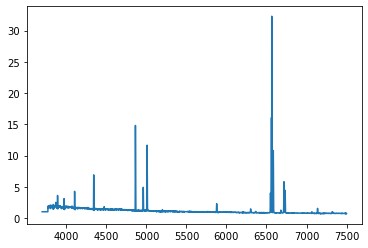

In [48]:
plt.plot(wave, spectra[idxs_no_filter[2]])

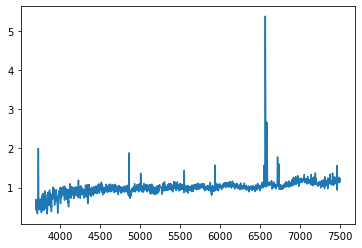

In [51]:
plt.plot(wave, spectra[idxs_filter[0]])